# Modeling
- **Import necessary libraries.**

In [1]:
# standard libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

# modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# saving libraries
import gzip
import pickle

# custom functions
from functions import *

# reload when functions is edited
%load_ext autoreload
%autoreload 2

## Load dataframes

In [2]:
df = pd.read_csv('data/5k_jan_thru_may_tweets_plus_features.csv', index_col=0)
df.shape

(575949, 22)

In [4]:
df.columns

Index(['date', 'tweet', 'username', 'link', 'nlikes', 'nreplies', 'nretweets',
       'sentiment_score', 'sentiment', 'clean_tweet', 'lda_topic_max', 'lda_0',
       'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9', 'subjectivity_score'],
      dtype='object')

In [14]:
with gzip.open('data/data_vec.pkl', 'rb') as hello:
    vectors_df = pickle.load(hello)  
vectors_df.shape

(575949, 3712)

### Combine necessary features columns

In [6]:
df[['lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9']].describe()

,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
count,575949.000000,575949.000000,575949.000000,575949.000000,575949.000000,575949.000000,575949.000000,575949.000000,575949.000000
mean,0.064772,0.089951,0.121448,0.102484,0.135416,0.053754,0.078181,0.056683,0.122927
std,0.084542,0.122402,0.157942,0.128598,0.156524,0.065011,0.098263,0.068388,0.155990
min,0.015212,0.015173,0.015566,0.014034,0.014033,0.015495,0.015167,0.015165,0.015559
25%,0.022714,0.023493,0.024005,0.024333,0.025375,0.022686,0.023524,0.022761,0.024353
50%,0.027953,0.029691,0.031358,0.031586,0.037070,0.027773,0.029737,0.027907,0.031785
75%,0.066274,0.108158,0.176420,0.144370,0.215923,0.041660,0.100000,0.050002,0.186281
max,0.749785,0.822302,0.828758,0.817670,0.822611,0.715675,0.773589,0.762236,0.830247


In [7]:
df[['lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9']].corr()

,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
lda_1,1.000000,-0.054220,-0.093482,-0.086108,-0.070060,-0.019698,-0.051527,-0.011108,-0.085963
lda_2,-0.054220,1.000000,-0.118673,-0.109646,-0.134135,-0.053659,-0.081139,-0.046189,-0.122597
lda_3,-0.093482,-0.118673,1.000000,-0.098829,-0.193345,-0.049933,-0.112622,-0.060436,-0.167473
lda_4,-0.086108,-0.109646,-0.098829,1.000000,-0.091672,-0.049188,-0.083589,-0.065812,-0.129122
lda_5,-0.070060,-0.134135,-0.193345,-0.091672,1.000000,-0.063161,-0.060166,-0.064941,-0.161086
lda_6,-0.019698,-0.053659,-0.049933,-0.049188,-0.063161,1.000000,-0.032606,-0.016190,-0.063243
lda_7,-0.051527,-0.081139,-0.112622,-0.083589,-0.060166,-0.032606,1.000000,-0.043088,-0.087296
lda_8,-0.011108,-0.046189,-0.060436,-0.065812,-0.064941,-0.016190,-0.043088,1.000000,-0.071874
lda_9,-0.085963,-0.122597,-0.167473,-0.129122,-0.161086,-0.063243,-0.087296,-0.071874,1.000000


In [8]:
feature_cols = ['nlikes', 'nreplies', 'nretweets', 'lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                'lda_6', 'lda_7', 'lda_8', 'lda_9', 'subjectivity_score']

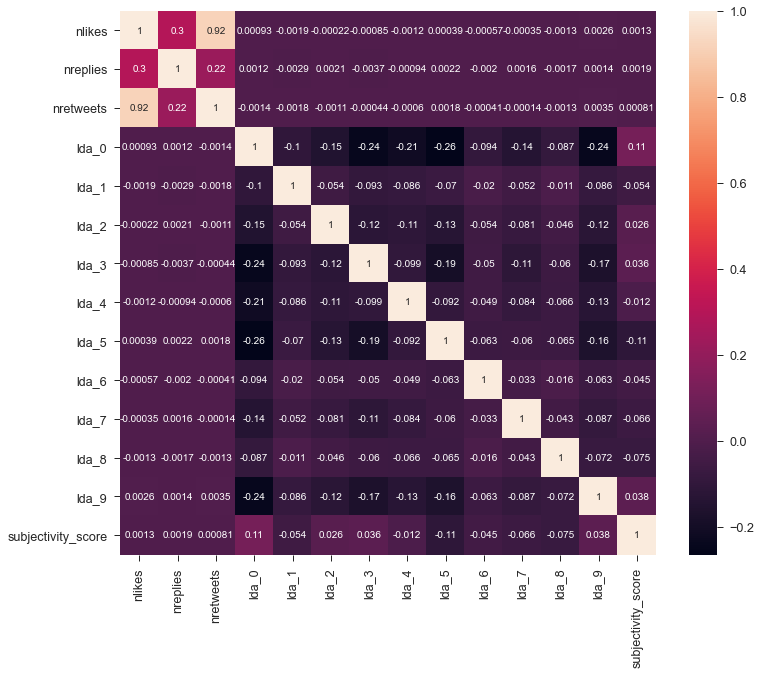

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df[feature_cols].corr(), annot=True)

In [13]:
feature_cols = ['nlikes', 'nreplies', 'lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                'lda_6', 'lda_7', 'lda_8', 'lda_9', 'subjectivity_score']

In [16]:
X = pd.concat([df[feature_cols], vectors_df], axis=1)
y = df['sentiment']

X.shape, y.shape

((575949, 3725), (575949,))

# Train Test Split

In [ ]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train.shape, X_test.shape

# MinMax Scaler

In [ ]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

# Standard Scaler

In [ ]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_ss = std_scaler.fit_transform(X_train)
X_test_ss = std_scaler.transform(X_test)

# Bernoulli Naive Bayes

In [ ]:
# create Bernoulli Naive Bayes object
bnb = BernoulliNB()

# train model
banaba_mm = bnb.fit(X_train_mm, y_train)
banaba_ss = bnb.fit(X_train_ss, y_train)

# predict on test data
y_pred_bnb_mm = banaba_mm.predict(X_test_mm)
y_pred_bnb_ss = banaba_ss.predict(X_test_ss)

print('MinMaxScaler Stats:')
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_bnb_mm))
# checking f1
print('Test F1 score: ', f1_score(y_test, y_pred_bnb_mm, average='weighted'))
# checking recall
print('Test Recall score: ', recall_score(y_test, y_pred_bnb_mm, average='weighted'))
# checking precision
print('Test Precision score: ', precision_score(y_test, y_pred_bnb_mm, average='weighted'))

print('-' * 100)

print('StandardScaler Stats:')
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_bnb_ss))
# checking f1
print('Test F1 score: ', f1_score(y_test, y_pred_bnb_ss, average='weighted'))
# checking recall
print('Test Recall score: ', recall_score(y_test, y_pred_bnb_ss, average='weighted'))
# checking precision
print('Test Precision score: ', precision_score(y_test, y_pred_bnb_ss, average='weighted'))

In [12]:
bnb = BernoulliNB()
bnb.fit(X_train_mm_scl, y_train)
bnb_preds = bnb.predict(X_test_mm_scl)

In [13]:
# Fit bernoulli naive bayes model on train data, predict on minmax scaler test data
bnb_fit_mm_scl = bnb(X_train_mm_scl, y_train)
bnb_preds_mm_scl = bnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(bnb_preds_mm_scl, y_test), f1_score(bnb_preds_mm_scl, y_test, average='weighted')

(0.6962663555296275, 0.6938904652543706)

In [18]:
# Fit bernoulli naive bayes model on train data, predict on standard scaler test data
bnb_fit_std_scl = bnb(X_train_std_scl, y_train)
bnb_preds_std_scl = bnb_fit_std_scl.predict(X_test_std_scl)

accuracy_score(bnb_preds_std_scl, y_test), f1_score(bnb_preds_std_scl, y_test, average='weighted')

(0.7007250604217018, 0.698552621939297)

In [57]:
# Feature count
bnb_fit_std_scl.feature_count_

array([[ 9643., 16881.,  9610., ...,   603.,   122.,   201.],
       [ 4336.,  6795.,  4322., ...,   157.,    22.,    52.],
       [11446., 17503., 10834., ...,   475.,    99.,   185.]])

In [68]:
# Top 10 most important features per class
pos_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[0, :].argsort()
neu_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[1, :].argsort()
neg_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[2, :].argsort()

print(np.take(features_df.columns, pos_class_prob_sorted[:10]))
print(np.take(features_df.columns, neu_class_prob_sorted[:10]))
print(np.take(features_df.columns, neg_class_prob_sorted[:10]))

Index(['#wholesale', 'okhand', '#sale', 'smilingfacewith3',
       'smilingfacewithheart', 'faceblowingakiss', '#love', '#safe',
       'twohearts', 'blueheart'],
      dtype='object')
Index(['incompetence', 'smilingfacewithheart', 'smilingfacewith3', 'heartsuit',
       'purpleheart', 'threatened', 'upset', 'discarded', 'noble', 'okhand'],
      dtype='object')
Index(['iniran', 'assault', 'suicide', 'thief', 'germany's', 'incompetence',
       'violent', 'gross', '#fight', 'declares'],
      dtype='object')


# Multinomial Naive Bayes

In [14]:
# Function to fit multinomial naive bayes model
def mnb(X_train, y_train):
    mnb = MultinomialNB()
    mnb_fit = mnb.fit(X_train, y_train)
    return mnb_fit

In [15]:
# Fit multinomial naive bayes model on train data, predict on minmax scaler test data
mnb_fit_mm_scl = mnb(X_train_mm_scl, y_train)
mnb_preds_mm_scl = mnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(mnb_preds_mm_scl, y_test), f1_score(mnb_preds_mm_scl, y_test, average='weighted')

(0.648366530544212, 0.6560903029607621)

# Decision Tree

In [25]:
# Function to fit decision tree model
def dt(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt_fit = dt.fit(X_train, y_train)
    return dt_fit

In [26]:
# Fit decision tree model on train data, predict on minmax scaler test data
dt_fit_mm_scl = dt(X_train_mm_scl, y_train)
dt_preds_mm_scl = dt_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(dt_preds_mm_scl, y_test), f1_score(dt_preds_mm_scl, y_test, average='weighted')

(0.723782537433675, 0.7237418687722337)

In [27]:
# Fit decision tree on train data, predict on standard scaler test data
dt_fit_std_scl = dt(X_train_std_scl, y_train)
dt_preds_std_scl = dt_fit_std_scl.predict(X_test_std_scl)

accuracy_score(dt_preds_std_scl, y_test), f1_score(dt_preds_std_scl, y_test, average='weighted')

(0.7228171792093786, 0.7227790464378497)

In [59]:
# Feature importances
dt_fit_std_scl.feature_importances_

array([1.37984427e-02, 7.07843347e-03, 6.19432068e-03, ...,
       1.73897035e-04, 3.40212838e-05, 9.40662773e-05])

In [73]:
features_dict = dict(zip(features_df.columns, dt_fit_mm_scl.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_d

[('subjectivity_score', 0.06111831308232892),
 ('nlikes', 0.01402649295835318),
 ('protect', 0.013184184251441364),
 ('help', 0.012865803628373692),
 ('infected', 0.011508287105684818),
 ('safe', 0.009374088894935299),
 ('please', 0.00832027302188848),
 ('death', 0.008313647504325852),
 ('hand', 0.007588242417386953),
 ('nreplies', 0.007010932702317728)]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


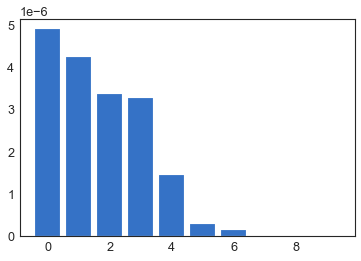

In [75]:
# Top 10 most important features
dt_importance = sorted(dt_fit_mm_scl.feature_importances_, reverse=True)[-10:]

for i,v in enumerate(dt_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

In [81]:
dt_features = dict(zip(features_df.columns, dt_fit_mm_scl.feature_importances_))
dt_features = dict(sorted(dt_features.items(), key=lambda x: x[1], reverse=True)[:10])
dt_features

{'subjectivity_score': 0.06111831308232892,
 'nlikes': 0.01402649295835318,
 'protect': 0.013184184251441364,
 'help': 0.012865803628373692,
 'infected': 0.011508287105684818,
 'safe': 0.009374088894935299,
 'please': 0.00832027302188848,
 'death': 0.008313647504325852,
 'hand': 0.007588242417386953,
 'nreplies': 0.007010932702317728}

In [84]:
dt_features.keys()

dict_keys(['subjectivity_score', 'nlikes', 'protect', 'help', 'infected', 'safe', 'please', 'death', 'hand', 'nreplies'])

<BarContainer object of 10 artists>

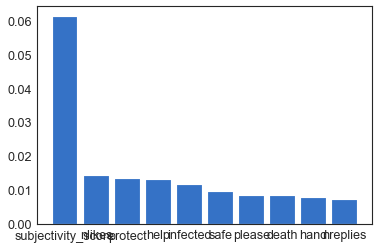

In [87]:
plt.bar(dt_features.keys(), dt_features.values())

# Confusion Matrix

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, color='white')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, color='white', rotation=45)
    plt.yticks(tick_marks, classes, color='white')
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=15,
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label', color='white')
    plt.xlabel('Predicted Label', color='white')

Normalized confusion matrix
[[0.70889576 0.08239822 0.20870602]
 [0.14535307 0.72822131 0.12642562]
 [0.19625418 0.06832776 0.73541806]]


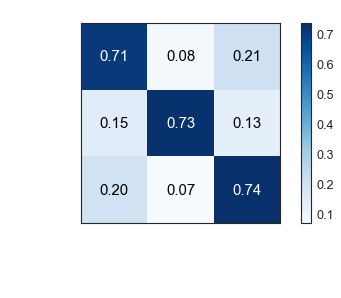

In [88]:
cm_dt_mm_scl = confusion_matrix(y_test, dt_preds_mm_scl)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_dt_mm_scl, classes, normalize=True,
                      title='Decision Tree Confusion Matrix', cmap=plt.cm.Blues)

# plt.savefig('Images/dt_conf_matrix.png', dpi = 100)

In [49]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(dt_fit_mm_scl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['negative','neutral', 'positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_twee.png')
Image(graph.create_png())